In [118]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

### DATA PREPROCESSING

### Load Data

In [119]:
df = pd.read_excel('ALF_Data.xlsx', sheet_name='Sheet1')

In [120]:
df.head(10)

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
5,26,F,east,119.3,193.2,31.96,1.0,117.9,129.0,70.0,...,0.0,0,0.0,1,0.0,0,0.0,0.0,0.0,0.0
6,66,F,north,85.1,172.1,28.73,0.0,99.2,137.0,92.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
7,59,M,east,69.9,160.9,27.00,0.0,101.5,124.0,73.0,...,0.0,0,0.0,1,1.0,1,0.0,0.0,0.0,0.0
8,53,M,east,75.2,174.1,24.81,0.0,85.6,110.0,74.0,...,0.0,1,1.0,1,0.0,0,0.0,0.0,0.0,0.0
9,78,M,north,47.6,155.3,19.74,0.0,70.3,170.0,78.0,...,0.0,0,1.0,0,1.0,1,1.0,0.0,NaN,0.0


In [121]:
df.columns

Index(['Age', 'Gender', 'Region', 'Weight', 'Height', 'Body Mass Index',
       'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol',
       'Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried',
       'Income', 'Source of Care', 'PoorVision', 'Alcohol Consumption',
       'HyperTension', 'Family  HyperTension', 'Diabetes', 'Family Diabetes',
       'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue', 'ALF'],
      dtype='object')

In [122]:
df.shape

(8785, 30)

### Checking Missing Values

In [123]:
df.ALF.unique()

array([ 0.,  1., nan])

In [124]:
df.ALF.isnull().sum()

2785

In [125]:
# remove the rows in the target column 'ALF' with missing values

data = df.dropna(subset=['ALF'])

In [126]:
data.shape

(6000, 30)

In [127]:
# Replace nominal values with numbers for
# Categorical data column: Gender
# METADATA
# Gender: Male = 1, Female = 0

data['Gender'] = data['Gender'].replace(['M', 'F'], [1, 0])


In [128]:
data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,1,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,1,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,1,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,1,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,1,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [129]:

data['Gender'].unique()

array([1, 0], dtype=int64)

In [130]:
# Replacing nominal values with numbers for
# Categorical data column: Region
# METADATA
# Region: east = 1, south = 2, north = 3, west = 4

data.Region = data.Region.replace(['east', 'south', 'north', 'west'], [1, 2, 3 , 4])


In [131]:
data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,1,1,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,1,2,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,1,1,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,1,1,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,1,3,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [132]:
data.Region.unique()

array([1, 2, 3, 4], dtype=int64)

In [133]:
data['Source of Care'].unique()

array(['Governament Hospital', 'Never Counsulted', 'Private Hospital',
       'clinic', ' '], dtype=object)

In [134]:
# Replace nominal values with numbers for
# Categorical data column: Source of Care
# METADATA
# Region: Governament Hospital = 1, Private Hospital = 2, clinic = 3, Never Counsulted = 4
data['Source of Care'] = data['Source of Care'].replace(['Governament Hospital', 'Never Counsulted', 'Private Hospital',
       'clinic', ' '], [1, 2, 3, 4, np.nan])

In [135]:
data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,1,1,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,1,2,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,1,1,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,1,1,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,1,3,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [136]:
data['Source of Care'].unique()

array([ 1.,  2.,  3.,  4., nan])

### Missing Values for Features

In [137]:
total_missing_values = data.isnull().sum()
total_missing_values

Age                         0
Gender                      0
Region                      0
Weight                    133
Height                    139
Body Mass Index           206
Obesity                   206
Waist                     215
Maximum Blood Pressure    206
Minimum Blood Pressure    252
Good Cholesterol            8
Bad Cholesterol             8
Total Cholesterol           6
Dyslipidemia                0
PVD                         0
Physical Activity           8
Education                  15
Unmarried                 301
Income                    792
Source of Care              2
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

In [138]:
data.columns

Index(['Age', 'Gender', 'Region', 'Weight', 'Height', 'Body Mass Index',
       'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol',
       'Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried',
       'Income', 'Source of Care', 'PoorVision', 'Alcohol Consumption',
       'HyperTension', 'Family  HyperTension', 'Diabetes', 'Family Diabetes',
       'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue', 'ALF'],
      dtype='object')

### Separating Continous (numerical) features from Categorical features

In [139]:

# Categorical Features

cat_features = data[['Age', 'Gender', 'Region', 'Obesity', 'Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried', 'Income', 'Source of Care', 'PoorVision', 'Alcohol Consumption', 'HyperTension', 'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue']]

# Continous (numerical)  Features

cont_features = data[['Weight', 'Height', 'Body Mass Index', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol']]

### Dealing with Continous Features: Replacing Missing Values with Mean (column)

In [140]:
cont_features.head()

,Weight,Height,Body Mass Index,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol
0,56.0,162.1,21.31,83.6,135.0,71.0,48.0,249.0,297.0
1,60.2,162.2,22.88,76.6,96.0,52.0,31.0,135.0,166.0
2,83.9,162.5,31.77,113.2,115.0,57.0,44.0,211.0,255.0
3,69.4,160.5,26.94,77.9,110.0,57.0,74.0,156.0,230.0
4,73.1,159.2,28.84,89.3,132.0,73.0,67.0,154.0,221.0


In [141]:
# Replacement with Column mean

cont_features = cont_features.fillna(cont_features.mean())

In [142]:
cont_features.head()

,Weight,Height,Body Mass Index,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol
0,56.0,162.1,21.31,83.6,135.0,71.0,48.0,249.0,297.0
1,60.2,162.2,22.88,76.6,96.0,52.0,31.0,135.0,166.0
2,83.9,162.5,31.77,113.2,115.0,57.0,44.0,211.0,255.0
3,69.4,160.5,26.94,77.9,110.0,57.0,74.0,156.0,230.0
4,73.1,159.2,28.84,89.3,132.0,73.0,67.0,154.0,221.0


In [143]:
cont_features.isnull().sum()

Weight                    0
Height                    0
Body Mass Index           0
Waist                     0
Maximum Blood Pressure    0
Minimum Blood Pressure    0
Good Cholesterol          0
Bad Cholesterol           0
Total Cholesterol         0
dtype: int64

### Dealing with Categorical data Features: Replacing missing values with the most frequent value

In [144]:
cat_features.head()

,Age,Gender,Region,Obesity,Dyslipidemia,PVD,Physical Activity,Education,Unmarried,Income,Source of Care,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
0,65,1,1,0.0,0,0,3.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0
1,36,1,2,0.0,0,0,3.0,0.0,NaN,1.0,2.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
2,66,1,1,1.0,1,0,1.0,0.0,1.0,0.0,2.0,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0
3,54,1,1,0.0,0,0,2.0,1.0,0.0,0.0,3.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0
4,63,1,3,0.0,0,0,1.0,0.0,0.0,NaN,4.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0


In [145]:
# Replacement with the mode (most frequent value)

cat_features = cat_features.fillna(cat_features.mode().iloc[0])

In [146]:
cat_features.head()

,Age,Gender,Region,Obesity,Dyslipidemia,PVD,Physical Activity,Education,Unmarried,Income,Source of Care,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
0,65,1,1,0.0,0,0,3.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0
1,36,1,2,0.0,0,0,3.0,0.0,0.0,1.0,2.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
2,66,1,1,1.0,1,0,1.0,0.0,1.0,0.0,2.0,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0
3,54,1,1,0.0,0,0,2.0,1.0,0.0,0.0,3.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0
4,63,1,3,0.0,0,0,1.0,0.0,0.0,0.0,4.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0


In [147]:
cat_features.isnull().values.any()

False

In [148]:
cat_features.isnull().sum()

Age                     0
Gender                  0
Region                  0
Obesity                 0
Dyslipidemia            0
PVD                     0
Physical Activity       0
Education               0
Unmarried               0
Income                  0
Source of Care          0
PoorVision              0
Alcohol Consumption     0
HyperTension            0
Family  HyperTension    0
Diabetes                0
Family Diabetes         0
Hepatitis               0
Family Hepatitis        0
Chronic Fatigue         0
dtype: int64

### Concatenation (Continous + Categorical)

In [149]:
data2 = pd.concat( [cont_features, cat_features], axis=1)

In [150]:
data2.head()

,Weight,Height,Body Mass Index,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol,Age,...,Source of Care,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
0,56.0,162.1,21.31,83.6,135.0,71.0,48.0,249.0,297.0,65,...,1.0,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0
1,60.2,162.2,22.88,76.6,96.0,52.0,31.0,135.0,166.0,36,...,2.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
2,83.9,162.5,31.77,113.2,115.0,57.0,44.0,211.0,255.0,66,...,2.0,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0
3,69.4,160.5,26.94,77.9,110.0,57.0,74.0,156.0,230.0,54,...,3.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0
4,73.1,159.2,28.84,89.3,132.0,73.0,67.0,154.0,221.0,63,...,4.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0


In [151]:
data2.isnull().sum()

Weight                    0
Height                    0
Body Mass Index           0
Waist                     0
Maximum Blood Pressure    0
Minimum Blood Pressure    0
Good Cholesterol          0
Bad Cholesterol           0
Total Cholesterol         0
Age                       0
Gender                    0
Region                    0
Obesity                   0
Dyslipidemia              0
PVD                       0
Physical Activity         0
Education                 0
Unmarried                 0
Income                    0
Source of Care            0
PoorVision                0
Alcohol Consumption       0
HyperTension              0
Family  HyperTension      0
Diabetes                  0
Family Diabetes           0
Hepatitis                 0
Family Hepatitis          0
Chronic Fatigue           0
dtype: int64

### Creating Train / Test / Validation split: No Scaling No SVD decomposition (29 feature columns)

In [152]:
# X = features
# y = target ('ALF')

X = data2
y = data['ALF']


# Ratios
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

# training set is now 70% of entire data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio)


In [153]:
# Now we are splitting the test data set to get the validation data set

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = test_ratio/(test_ratio + validation_ratio))

In [154]:
print(x_train.shape, x_val.shape, x_test.shape)

(4199, 29) (600, 29) (1201, 29)


### Scaling Training Data

In [155]:
# X = features
# y = target ('ALF')

X = data2
y = data['ALF']

# Creating a Standard Scaler object

scaler = StandardScaler()
scaler.fit(X)
Xs = scaler.transform(X)

### SVD = Singular Value Decomposition: For Training Data

After testing different number of components: 20 accounts for just above 90% (instead of 29 columns)


Number of Components:
 20

Explained variance ratio:
 [0.13648692 0.09444529 0.07029718 0.06939104 0.05255391 0.0492401
 0.04086418 0.03841579 0.03541474 0.03506635 0.03441907 0.03184197
 0.03149554 0.03075144 0.03046595 0.02891823 0.0265313  0.02516276
 0.02339246 0.02295561]

Explained variance ratio Sum:
 0.9081098399271129

Explained Variance Ratio Sum (%):
 90.81098399271129


Text(0, 0.5, 'Fraction of Total Variance')

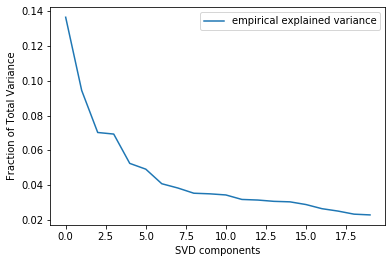

In [156]:
n_components = 20

svd = TruncatedSVD(n_components = n_components).fit(Xs)

# Calculate total variance 
total_variance = np.var(Xs, axis=0).sum()

# Reduce the training data to number of components
X_transformed = svd.transform(Xs)

# Calculate the new variance
variances = np.var(X_transformed, axis=0)

# Calculate the true explained variance ratio = variances / total variance
true_explained_variance_ratio = variances / total_variance

# Reporting how many components were selected and their variance ratios
print("\nNumber of Components:\n", n_components)
print("\nExplained variance ratio:\n", true_explained_variance_ratio)
print("\nExplained variance ratio Sum:\n", svd.explained_variance_ratio_.sum())

percentage = svd.explained_variance_ratio_.sum() * 100
print("\nExplained Variance Ratio Sum (%):\n", percentage)

plt.plot(true_explained_variance_ratio, label='empirical explained variance')
plt.legend(loc='best')
plt.xlabel('SVD components')
plt.ylabel('Fraction of Total Variance')

### Creating Train / Test / Validation split: with Scaling and SVD decomposition (only 20 columns)

In [157]:
# Ratios

train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20


# training set is 70% of entire dataset
Xt_train, Xt_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 1 - train_ratio)



In [158]:
# Now we are splitting the test data set to get the validation data set

Xt_val, Xt_test, y_val, y_test = train_test_split(Xt_test, y_test, test_size = test_ratio/(test_ratio + validation_ratio))

In [159]:
print(Xt_train.shape, Xt_val.shape, Xt_test.shape)

(4199, 20) (600, 20) (1201, 20)


## CLASSIFICATION MODELS

### Classification Model: k-Nearest Neighbors (KNN) - No Scaling - No SVD decomposition (29 columns)

In [176]:
# Creating kNearestNeighbors Classifier model objects

for n in range(2, 12):
    # Create and fit the KNN model
    knn1 = KNeighborsRegressor(n_neighbors = n)
    
    # fit the model to the TRAINING DATASET
    knn1.fit(x_train, y_train)
    
    # print number of neighbors and the R2 score to find
    # the best value of n
    # CHECK FOR OVERFITTING -> USING THE VALIDATION DATASET
    print("n_neighbors =", n)
    
    print('train   R^2 score = ', round(knn1.score(x_train, y_train), 4))
    print('validation R^2 score = ', round(knn1.score(x_val, y_val), 4))

n_neighbors = 2
train   R^2 score =  0.4684
validation R^2 score =  -0.6102
n_neighbors = 3
train   R^2 score =  0.3151
validation R^2 score =  -0.38
n_neighbors = 4
train   R^2 score =  0.2179
validation R^2 score =  -0.2956
n_neighbors = 5
train   R^2 score =  0.1613
validation R^2 score =  -0.2503
n_neighbors = 6
train   R^2 score =  0.1305
validation R^2 score =  -0.2241
n_neighbors = 7
train   R^2 score =  0.119
validation R^2 score =  -0.1929
n_neighbors = 8
train   R^2 score =  0.1068
validation R^2 score =  -0.1618
n_neighbors = 9
train   R^2 score =  0.0963
validation R^2 score =  -0.1457
n_neighbors = 10
train   R^2 score =  0.087
validation R^2 score =  -0.1118
n_neighbors = 11
train   R^2 score =  0.0804
validation R^2 score =  -0.0928


### Classification Model: KNN - Scaling and SVD decomposition (20 columns)

In [161]:
# Creating knearestneighbors 

for n in range(2, 12):
    
    knn2 = KNeighborsRegressor(n_neighbors= n)
    
    knn2.fit(Xt_train, y_train)
    
    # print number of neighbors and the R2 score to find
    # the best value of n
    # CHECK FOR OVERFITTING -> USING THE VALIDATION DATASET
    print("n_neighbors =", n)
    
    print('train   R^2 score = ', round(knn2.score(Xt_train, y_train), 4))
    print('validation R^2 score = ', round(knn2.score(Xt_val, y_val), 4))

n_neighbors = 2
train   R^2 score =  0.6089
validation R^2 score =  0.0131
n_neighbors = 3
train   R^2 score =  0.4771
validation R^2 score =  0.074
n_neighbors = 4
train   R^2 score =  0.4018
validation R^2 score =  0.1603
n_neighbors = 5
train   R^2 score =  0.3608
validation R^2 score =  0.1403
n_neighbors = 6
train   R^2 score =  0.3402
validation R^2 score =  0.1401
n_neighbors = 7
train   R^2 score =  0.3191
validation R^2 score =  0.1694
n_neighbors = 8
train   R^2 score =  0.3048
validation R^2 score =  0.192
n_neighbors = 9
train   R^2 score =  0.2924
validation R^2 score =  0.198
n_neighbors = 10
train   R^2 score =  0.2916
validation R^2 score =  0.2017
n_neighbors = 11
train   R^2 score =  0.2806
validation R^2 score =  0.189


### Classification Model: Gaussian Naive Bayes Classifier - No Scaling No SVD decomposition (29 columns) 

In [162]:
# Creating a Gaussian Classifier
gnb1 = GaussianNB()

# Train the model using the TRAINING DATASET
gnb1.fit(x_train, y_train)

print('train R^2 score = ', round(gnb1.score(x_train, y_train), 4))

train R^2 score =  0.9095


### Classification Model: GNB with Scaling and SVD decomposition (20 columns only)

In [163]:
# Creating a Gaussian Classifier
gnb2 = GaussianNB()

# Train the model using the TRAINING DATASET
gnb2.fit(Xt_train, y_train)

print('train R^2 score = ', round(gnb2.score(Xt_train, y_train), 4))

train R^2 score =  0.8659


### Classification Model: Decision Tree - No Scaling - No SVD decomposition (29 columns)

In [164]:
# Creating decision tree object
tree1 =  DecisionTreeClassifier()

# Training the model
tree1 = tree1.fit(x_train, y_train)

print('train R^2 score = ', round(tree1.score(x_train, y_train), 4))

train R^2 score =  1.0


### Classification Model: Decision Tree -  with Scaling and SVD decomposition (20 columns only)

In [165]:
# Creating decision tree object
tree2 =  DecisionTreeClassifier()

# Training the model
tree2 = tree2.fit(Xt_train, y_train)

print('train R^2 score = ', round(tree2.score(Xt_train, y_train), 4))

train R^2 score =  1.0


### Classification Model: Logistic Regression - No Scaling - No SVD decomposition (29 columns)

In [166]:
# Creating logistic regression object

log1 = LogisticRegression(solver='newton-cg')

# Training the model
log1.fit(x_train, y_train)


print('train R^2 score = ', round(log1.score(x_train, y_train), 4))

train R^2 score =  0.9219


### Classification Model: Logistic Regression -  with Scaling and SVD decomposition (20 columns only)

In [167]:
# Creating logistic regression object

log2 = LogisticRegression(solver='newton-cg')

# Training the model
log2.fit(Xt_train, y_train)


print('train R^2 score = ', round(log2.score(Xt_train, y_train), 4))

train R^2 score =  0.9233


### Classification Model: Linear Regression - No Scaling - No SVD decomposition (29 columns)

In [168]:
# Creating logistic regression object

linear = LinearRegression()

# Training the model
linear.fit(x_train, y_train)


print('train R^2 score = ', round(linear.score(x_train, y_train), 4))



train R^2 score =  0.0053


**NOTE ON LINEAR REGRESSION:**  Linear regression is not suitable for Binary Classification

    .The predicted value is continous, not probabilistic
    . in a binary classification problem, we are trying to obtain the probability of an outcome (0 or 1 in this case)
    . therefore Logistic Regression is more suitable for a classification task 

## RESULTS AND EVALUATION

### k_Nearest Neighbors (KNN) - Scaling and SVD decomposition (20 columns only)

In [179]:
# Create the model with the best-performing 
# k --> number of neighbors = 8

n = 8

knn2 = KNeighborsClassifier(n_neighbors= n) 

# fit the model to the training data
knn2.fit(Xt_train, y_train)

# Predicting using the TEST DATASET
y_pred_knn = knn2.predict(Xt_test)

# Calculating the accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)

# Model Accuracy, how often is the classifier correct?
print("\nAccuracy:", accuracy_knn)
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_knn))

# Confusion Matrix from Pandas
print("\nConfusion Matrix (Pandas) :\n")
print(pd.crosstab(y_test,  y_pred_knn, rownames=["True"], colnames=["Predicted"], margins=True))

# Full Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))


Accuracy: 0.9217318900915903

Confusion Matrix: 
 [[1104    8]
 [  86    3]]

Confusion Matrix (Pandas) :

Predicted   0.0  1.0   All
True                      
0.0        1104    8  1112
1.0          86    3    89
All        1190   11  1201

Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1112
         1.0       0.27      0.03      0.06        89

    accuracy                           0.92      1201
   macro avg       0.60      0.51      0.51      1201
weighted avg       0.88      0.92      0.89      1201



### Gaussian Naive Bayes Classifier - No Scaling - No SVD decomposition (29 columns)

In [170]:
# Using 'gnb1'

# Predicting USING THE TEST DATASET
y_pred_gnb = gnb1.predict(x_test)

# Calculating the accuracy
accuracy_gnb = metrics.accuracy_score(y_test, y_pred_gnb)

# Model Accuracy, how often is the classifier correct?
print("\nAccuracy:", accuracy_gnb)
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_gnb))

# Confusion Matrix from Pandas
print("\nConfusion Matrix (Pandas) :\n")
print(pd.crosstab(y_test,  y_pred_gnb, rownames=["True"], colnames=["Predicted"], margins=True))

# Full Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gnb))




Accuracy: 0.9142381348875936

Confusion Matrix: 
 [[1097   15]
 [  88    1]]

Confusion Matrix (Pandas) :

Predicted   0.0  1.0   All
True                      
0.0        1097   15  1112
1.0          88    1    89
All        1185   16  1201

Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1112
         1.0       0.06      0.01      0.02        89

    accuracy                           0.91      1201
   macro avg       0.49      0.50      0.49      1201
weighted avg       0.86      0.91      0.89      1201



### Classification Model: Decision Tree - No Scaling - No SVD decomposition (29 columns)

In [171]:
# Using 'tree1'

# Predicting USING THE TEST DATASET
y_pred_tree1 = tree1.predict(x_test)

# Calculating the accuracy
accuracy_tree1 = metrics.accuracy_score(y_test, y_pred_tree1)

# Model Accuracy, how often is the classifier correct?
print("\nAccuracy:", accuracy_tree1)
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_tree1))

# Confusion Matrix from Pandas
print("\nConfusion Matrix (Pandas) :\n")
print(pd.crosstab(y_test,  y_pred_tree1, rownames=["True"], colnames=["Predicted"], margins=True))

# Full Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_tree1))


Accuracy: 0.8451290591174022

Confusion Matrix: 
 [[1009  103]
 [  83    6]]

Confusion Matrix (Pandas) :

Predicted   0.0  1.0   All
True                      
0.0        1009  103  1112
1.0          83    6    89
All        1092  109  1201

Classification Report:

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      1112
         1.0       0.06      0.07      0.06        89

    accuracy                           0.85      1201
   macro avg       0.49      0.49      0.49      1201
weighted avg       0.86      0.85      0.85      1201



### Classification Model: Decision Tree - Scaling and SVD decomposition (20 columns only)

In [172]:
# Using 'tree2'

# Predicting USING THE TEST DATASET
y_pred_tree2 = tree2.predict(Xt_test)

# Calculating the accuracy
accuracy_tree2 = metrics.accuracy_score(y_test, y_pred_tree2)

# Model Accuracy, how often is the classifier correct?
print("\nAccuracy:", accuracy_tree2)
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_tree2))

# Confusion Matrix from Pandas
print("\nConfusion Matrix (Pandas) :\n")
print(pd.crosstab(y_test,  y_pred_tree2, rownames=["True"], colnames=["Predicted"], margins=True))

# Full Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_tree2))


Accuracy: 0.8626144879267277

Confusion Matrix: 
 [[1013   99]
 [  66   23]]

Confusion Matrix (Pandas) :

Predicted   0.0  1.0   All
True                      
0.0        1013   99  1112
1.0          66   23    89
All        1079  122  1201

Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92      1112
         1.0       0.19      0.26      0.22        89

    accuracy                           0.86      1201
   macro avg       0.56      0.58      0.57      1201
weighted avg       0.88      0.86      0.87      1201



### Classification Model: Logistic Regression -  with Scaling and SVD decomposition (20 columns only)

In [173]:
# Using 'log2'

# Predicting USING THE TEST DATASET
y_pred_log = log2.predict(Xt_test)

# Calculating the accuracy
accuracy_log = metrics.accuracy_score(y_test, y_pred_log)

# Model Accuracy, how often is the classifier correct?
print("\nAccuracy:", accuracy_log)
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_log))

# Confusion Matrix from Pandas
print("\nConfusion Matrix (Pandas) :\n")
print(pd.crosstab(y_test,  y_pred_log, rownames=["True"], colnames=["Predicted"], margins=True))

# Full Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log))


Accuracy: 0.9200666111573689

Confusion Matrix: 
 [[1094   18]
 [  78   11]]

Confusion Matrix (Pandas) :

Predicted   0.0  1.0   All
True                      
0.0        1094   18  1112
1.0          78   11    89
All        1172   29  1201

Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1112
         1.0       0.38      0.12      0.19        89

    accuracy                           0.92      1201
   macro avg       0.66      0.55      0.57      1201
weighted avg       0.89      0.92      0.90      1201



## RESULTS

### Which classifier performed better?


 Accuracy from KNN =  0.922

 Accuracy from Naive Bayes =  0.914


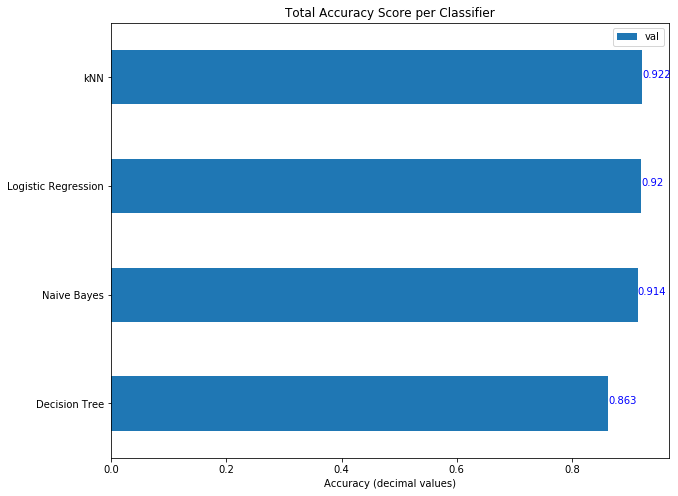

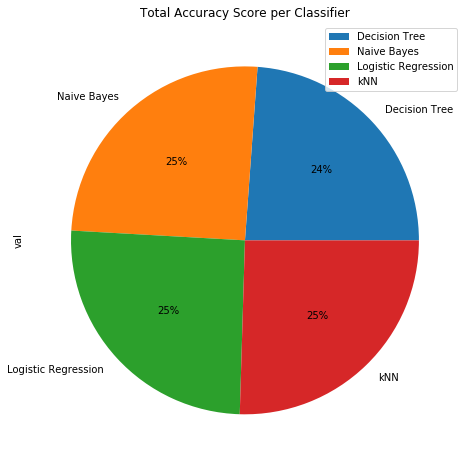

In [187]:
print("\n Accuracy from KNN = ", round(accuracy_knn, 3))
print("\n Accuracy from Naive Bayes = ", round(accuracy_gnb, 3))

acc_knn  = round(accuracy_knn, 3)
acc_gnb  = round(accuracy_gnb, 3)
acc_tree = round(accuracy_tree2, 3)
acc_log  = round(accuracy_log, 3)


accuracy_lst = [acc_tree, acc_gnb, acc_log, acc_knn]
classifier = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'kNN']

df3 = pd.DataFrame({'lab': classifier, 'val': accuracy_lst}, index=classifier)



ax = df3.plot.barh(figsize=(10,8))
for i, v in enumerate(accuracy_lst):
    ax.text(v, i, str(v), color='blue')

plt.title("Total Accuracy Score per Classifier")
plt.xlabel("Accuracy (decimal values)")
plt.show()

df3.plot.pie('val', autopct='%1.0f%%', figsize=(8,8))
plt.title("Total Accuracy Score per Classifier")
plt.show()

## CONCLUSION

Naive Bayes (advantages and disadvantages):

1. Naïve Bayesian classifiers assume that there are no dependencies amongst attributes. This assumption is called class conditional independence. It is made to simplify the computations involved and, hence is called "naive" 

2. Naive Bayes is a linear classifier while K-NN is not; It tends to be faster when applied to big data.   In comparison, k-nn is usually slower for large amounts of data, because of the calculations required for each new step in the process. If speed is important, choose Naive Bayes over K-NN.

3. In general, Naive Bayes is highly accurate when applied to big data. Don't discount K-NN when it comes to accuracy though; as the value of k in K-NN increases, the error rate decreases until it reaches that of the ideal Bayes (for k→∞).  

4. This method is not affected by the curse of dimensionality and large feature sets, while K-NN has problems with both.

5. side-step the curse of dimensionality

6. Graphical-model based classifiers, such as Naive Bayes, are invariant to feature scaling

7. It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

K-nn  (advantages and disadvantages):

1. If having conditional independence will highly negative affect classification, you'll want to choose K-NN over Naive Bayes. 

2. Naive Bayes requires that you known the underlying probability distributions for categories. The algorithm compares all other classifiers against this ideal. Therefore, unless you know the probabilities and pdfs, use of the ideal Bayes is unrealistic. In comparison, K-NN doesn't require that you know anything about the underlying probability distributions.

3. classifiers that tend to model non-linear decision boundaries very accurately (KNN classifiers) do not generalize well and are prone to overfitting. Therefore, the dimensionality should be kept relatively low when these classifiers are used

4.  algorithms that exploit distances or similarities (e.g. in form of scalar product) between data samples, such as k-NN, are sensitive to feature transformations

5. there is no explicit training phase before classification. kNN tends to work best on smaller data-sets that do not have many features. k-NN algorithm does more computation on test time rather than train time

6. k-NN performs much better if all of the data have the same scale

7. k-NN works well with a small number of input variables (p), but struggles when the number of inputs is very large

8. k-NN makes no assumptions about the functional form of the problem being solved

9.  In k-NN it is very likely to overfit due to the curse of dimensionality, in order to handle that problem:Dimensionality Reduction

Logistic Regression:

    . Main Strenghth vs KNN:  It is not susceptible to OVERFITTING
    . KNN suffers from its main weakness which its tendency to overfit
    . When data is linearly correlated it boosts accuracy of Logistic Regression --> Body Mass Index correlation with Weight and Height